# Visualize Character Trajectories Data

In [5]:
import os
from sktime.datasets import load_from_tsfile_to_dataframe
import numpy as np
import torch

# Load the data
train_X, train_y = load_from_tsfile_to_dataframe('../../data/raw//char_traj/CharacterTrajectories_TRAIN.ts')
test_X, test_y = load_from_tsfile_to_dataframe('../../data/raw/char_traj/CharacterTrajectories_TEST.ts')

# Convert to NumPy arrays
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()

# Concatenate the data to form a single dataset
X = np.concatenate((train_X, test_X), axis=0)   # (batch, channel)
y = np.concatenate((train_y, test_y), axis=0)   # (batch,)

# Change the labels to start from 0 and be integers
classes = np.unique(y)
y = np.array([np.where(classes == yi)[0][0] for yi in y])

(2858, 3)
(2858,)
-0.13014950245696325


160


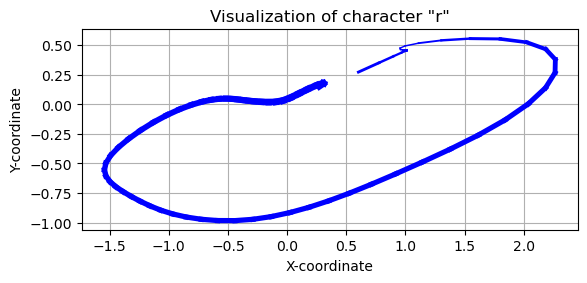

In [134]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, 2857) # between 0 - 2857
print(index)

# Dictionary mapping index to characters
index_to_character = {
    0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'g', 6: 'h', 7: 'l', 8: 'm', 9: 'n',
    10: 'o', 11: 'p', 12: 'q', 13: 'r', 14: 's', 15: 'u', 16: 'v', 17: 'w', 18: 'y', 19: 'z'
}

x_values = X[index][0].values
y_values = X[index][1].values
force_values = X[index][2].values

'''
x_values = X[index][1].values
y_values = X[index][0].values
force_values = X[index][2].values


x_values = X[index][2].values
y_values = X[index][1].values
force_values = X[index][0].values

x_values = X[index][0].values
y_values = X[index][1].values
force_values = X[index][2].values
'''

# Normalize the force values to the range [0, 1]
force_values_normalized = (force_values - force_values.min()) / (force_values.max() - force_values.min())

character = index_to_character.get(y[index])

# Iterate over each point and draw the pen strokes
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i+1]], [y_values[i], y_values[i+1]], 
         linewidth=1 + 4 * force_values_normalized[i].item(),  # Adjust line width based on force value
         color='blue')
'''
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='blue')  # Scatter plot
'''
# Use the character to name the graph
if character:
    plt.title(f'Visualization of character "{character}"')
else:
    plt.title('Visualization')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
